# Fundamentals of Data Analysis

## Project 2020

In this project perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

For enhancement, compare simple linear regression to
other types of regression on this data set

***

### Importing Python Libaries

In [57]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#skleanr linear regression
import sklearn.linear_model as lin

#sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score

#skleanr polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [58]:
#style of plot to be used
plt.style.use("ggplot")

#plot sizes
plt.rcParams['figure.figsize'] = [24, 20]

### Dataset

In [3]:
#reading in the dataset
df = pd.read_csv('powerproduction.txt')

In [4]:
#data types
df.dtypes

speed    float64
power    float64
dtype: object

In [5]:
#summary statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


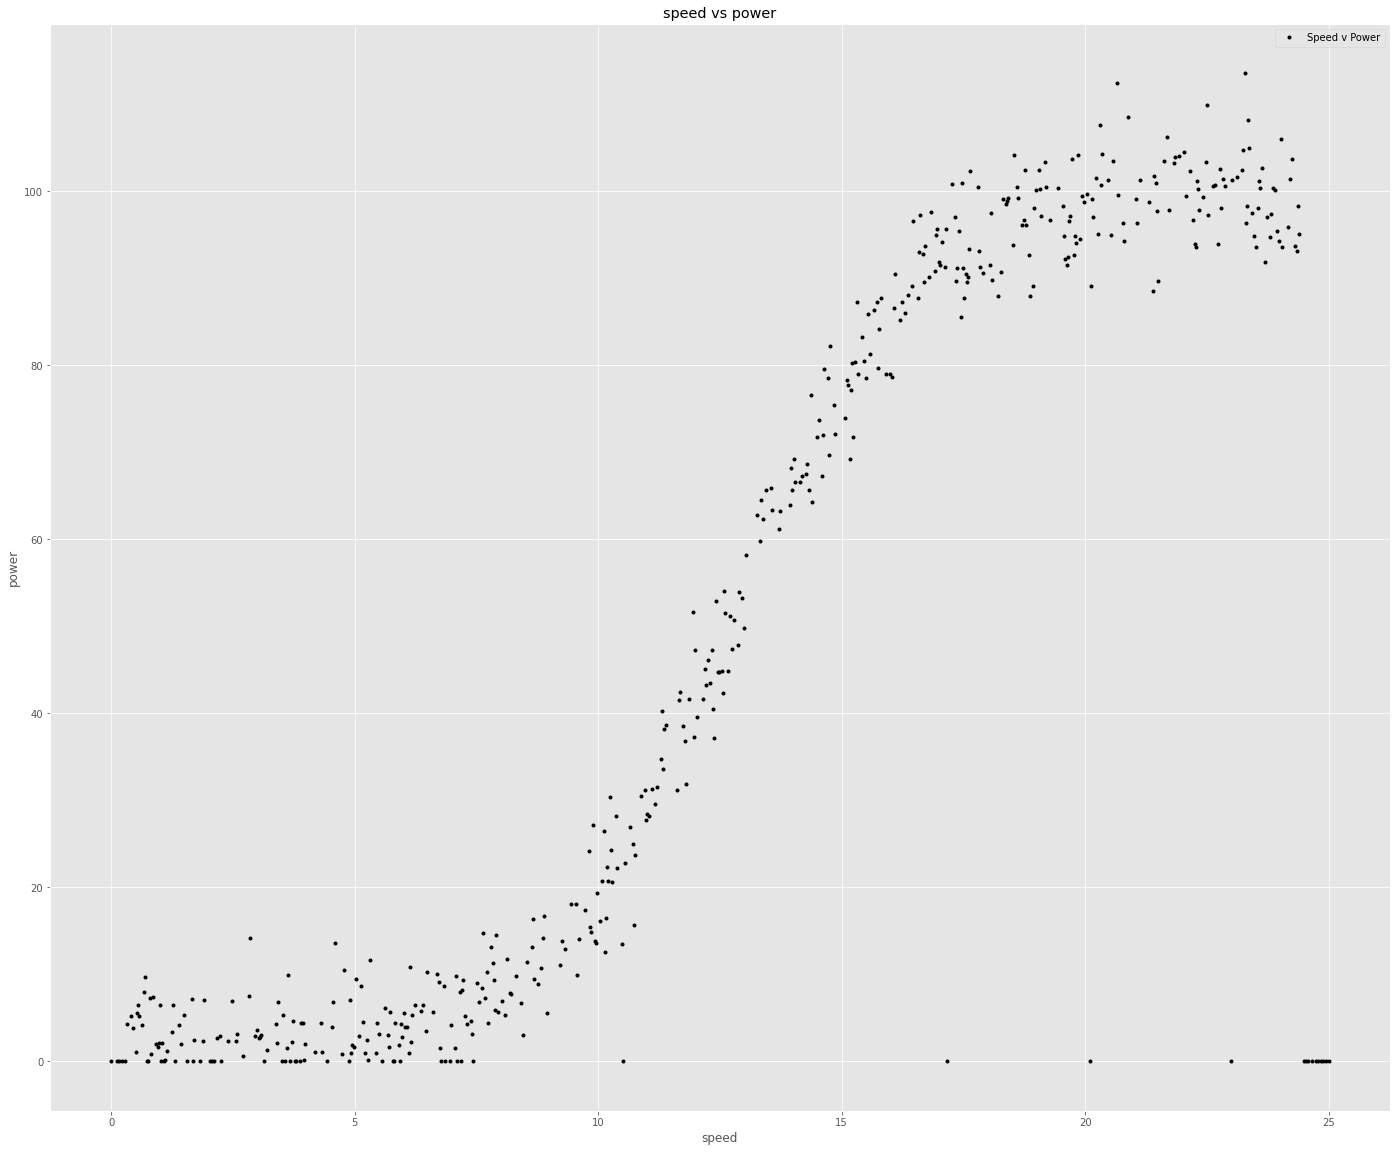

In [6]:
#plotting the dataset
plt.plot(df['speed'],df['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')
plt.legend();

Looking at the relationship between speed and power we can see that when the speed gets above 10, the power begins to increase sharply but flattens out again once the speed reaches approx 17.5. 

There are also a number of zero values for power when speed is greater than zero. We may view theswe as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison.

The relationship between speed and power shows a curve or *s shape* pattern. This suggests we should investigate different degrees values when fitting our best fit line.

***

## Simple Linear Regression with Numpy Polyfit all values

$ y = mx + c $

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

Using the numpy polyfit function we can identify the coefficents or the $m$ and the $c$. For a staright line we will pass *1* as the degree to create a straight line. Later we will look at applying different degrees to prehaps get a better overall fit.

A simple linear regression estimates the relationship between the values. In the dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is *dependent* on Speed *(independent)*. 



In [7]:
#power and speed values as variables
speed = df['speed']
power = df['power']

#polyfit function, identifiying coeffieients
coeffs= np.polyfit(speed,power,1)

### Function for prediction

Using the coefficients from the polyfit function, we will create a simple predict function.

In [59]:
#function to use coefficents to predict values
def predict_m1(x):
    pred = coeffs[0] *+ x + coeffs[1]
    return pred

***

## Model Accuaracy Indicactors

### Coefficient of determination

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

The R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model. In general the higher the value the better the model fits the data.

The R-squared values range from 0 to 1 and are repesneted by percentages. It really only works  with one explanatory variable.

In [62]:
#calculating R-squared value for the dataset
rsq = np.corrcoef(power,speed)[0][1]**2

### Root Mean Squared Error

$MSE=\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data. It gives an absolute number on how much the predicted results deviate from the actual number. Not many insights can be interpreted from one single result but it gives a real number to compare against other model results in helping to select the best regression model.

$RMSE=\sqrt{MSE}$

RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

The lower the RMSE value means an indication of a better model fit.

In [63]:
#calculating the Root Mnean Squared Error
rmse = np.sqrt((np.sum((predict_m1(speed) - power)**2))/len(power))

### Cost Function

$$ \sum_i (y_i - mx_i - c)^2 $$

The cost function when applying the coffeficents identified by the polyfit function is the mean of the squared differences between predicted y and actual y (i.e. the residuals). The lower the cost means more accuracy in the model.

In [11]:
#caluclating cost 
#ref https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
cost1 = lambda m,c: np.sum([(power[i] - coeffs[0] * speed[i] - coeffs[1])**2 for i in range(speed.size)])
c1 = cost1(coeffs[0],coeffs[1])

### Plotting best fit line

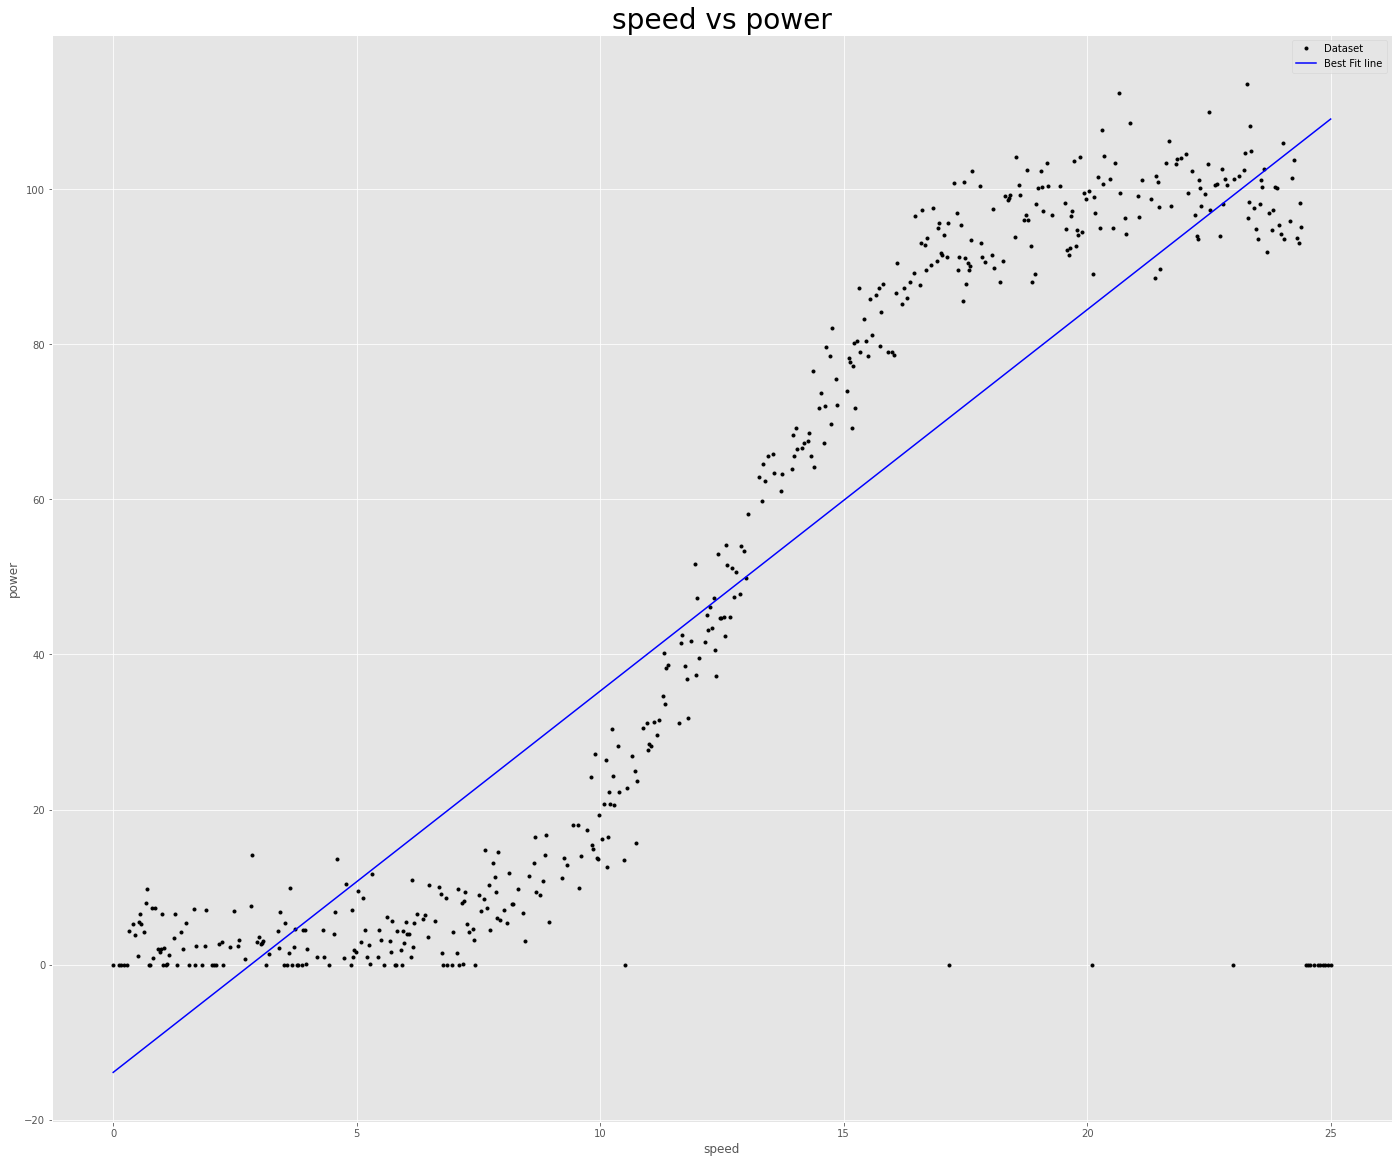

In [12]:
plt.plot(df['speed'],df['power'],'.',color='black',label = 'Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed,predict_m1(speed),color='blue',label = 'Best Fit line')
plt.legend();

The R-squared vaue of .728 is a pretty decent fit for the model. From observing the above plot it is very noticable that a straight line does not fit the shape of the data. The outliers for power when speed is greater than zero also effect the model accuaracy and rmse score. 

In [13]:
#print off of regression accuracy indicators 
print("The R-squared value is %6.4f" % rsq)
print("The Root Mean Squared error value is %6.4f" % rmse)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs[0],coeffs[1], cost1(coeffs[0],coeffs[1])))

The R-squared value is 0.7289
The Root Mean Squared error value is 21.6445
Cost with m =  4.92 and c = -13.90: 234241.16


***

## Simple Linear Regression with Numpy Polyfit removing zero values for power

In the next regression model, all values where power is at zero have been removed.

In [66]:
#new dataframe removing zeros
#ref https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df2 = df[df['power']!=0].reset_index()

In [67]:
#power and speed values as variable
#data with outliers removed
power2 = df2['power']
speed2 = df2['speed']

#polyfit function, identifiying coeffieients
coeffs2= np.polyfit(speed2,power2,1)

### Predict function

In [68]:
#predict function
def predict_m2(x):
    return coeffs2[0] *+ x + coeffs2[1]

### Calculating metrics/accuracy

In [17]:
#calculating R-squared value for the dataset
rsq2 = np.corrcoef(power2,speed2)[0][1]**2

#caluclating rmse
rmse2 = np.sqrt((np.sum((predict_m2(speed2) - power2)**2))/len(power2))

#calculating cost
cost2 = lambda m,c: np.sum([(power2[i] - coeffs2[0] * speed2[i] - coeffs2[1])**2 for i in range(speed2.size)])

#cost variable for barplot
c2 = cost2(coeffs2[0],coeffs2[1])

### Plotting best fit line

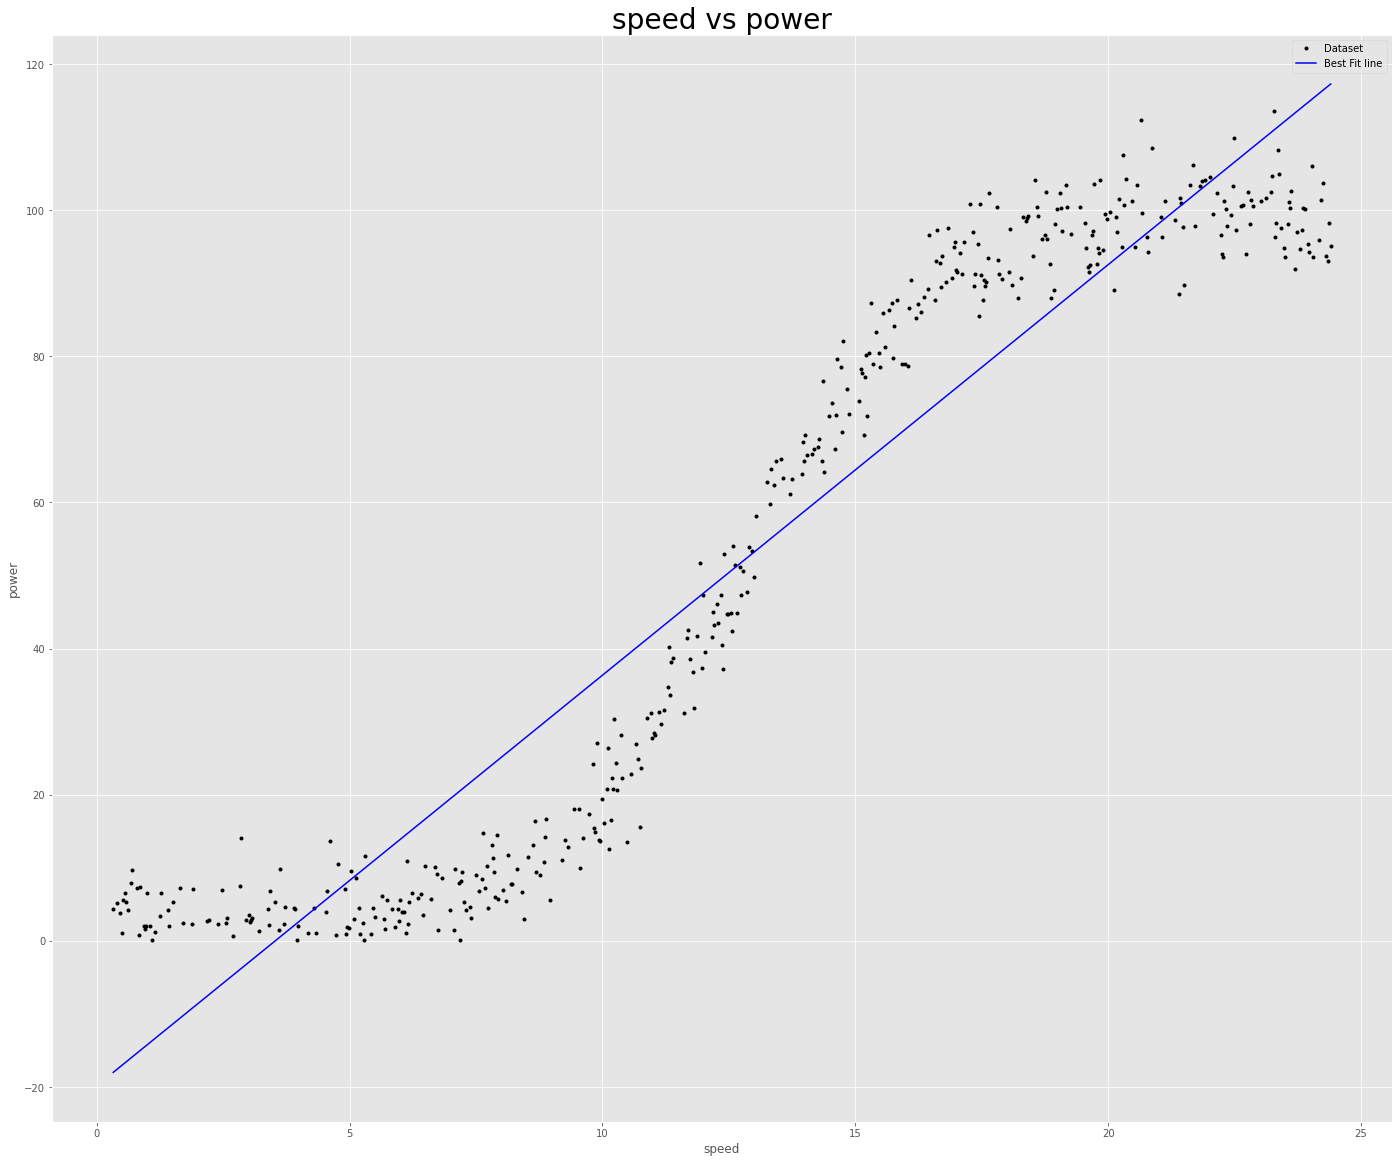

In [70]:
plt.plot(df2['speed'],df2['power'],'.',color='black',label='Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed2,predict_m2(speed2),color='blue',label = 'Best Fit line')
plt.legend();

The R-squared vaue of .8985 is a much better fit than the original model with all the data. Also by removing the zero values for power, the rmse has halfed and the cost is also significantly reduced.

Getting a better understanding of the data in terms of its collection, possible anomolies etc. would indicate whether to remove these outliers or not.

In [71]:
#print of regression accuarcy/metrics
print("The R-squared value is %6.4f" % rsq2)
print("The Root Mean Squared error value is %6.4f" % rmse2)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs2[0],coeffs2[1], cost2(coeffs2[0],coeffs2[1])))

The R-squared value is 0.8985
The Root Mean Squared error value is 12.8967
Cost with m =  5.62 and c = -19.84: 75012.39


***

## Simple Linear Regression SK Learn

Using pythons SK Learn package we will do a further regression analysis on the data and compare results using numpys polyfit.A regression will be run on the dataset with outliers removed. Another regression will be ran on the same dataset by splitting the data into test and training data.

In [20]:
#importing sklean linear regression
#ref https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#import sklearn.linear_model as lin

#importing skleanr metrics
#ref https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
#from sklearn.metrics import mean_squared_error, r2_score

#speed values to numpy array
# data with outliers removed
x = speed2.to_numpy()

#power values to numpy array
#data with outliers removed
y = power2.to_numpy()

#reshaping ref lecture notes
x = x.reshape(-1,1)

#variable for model type
model = lin.LinearRegression()

#fitting data to the model
model.fit(x, y)

#variable for coefficients
coeffs3 = [model.coef_[0],model.intercept_]

### Predict function

In [73]:
def predict_m3(x):
    return coeffs3[0] *+ x + coeffs3[1]

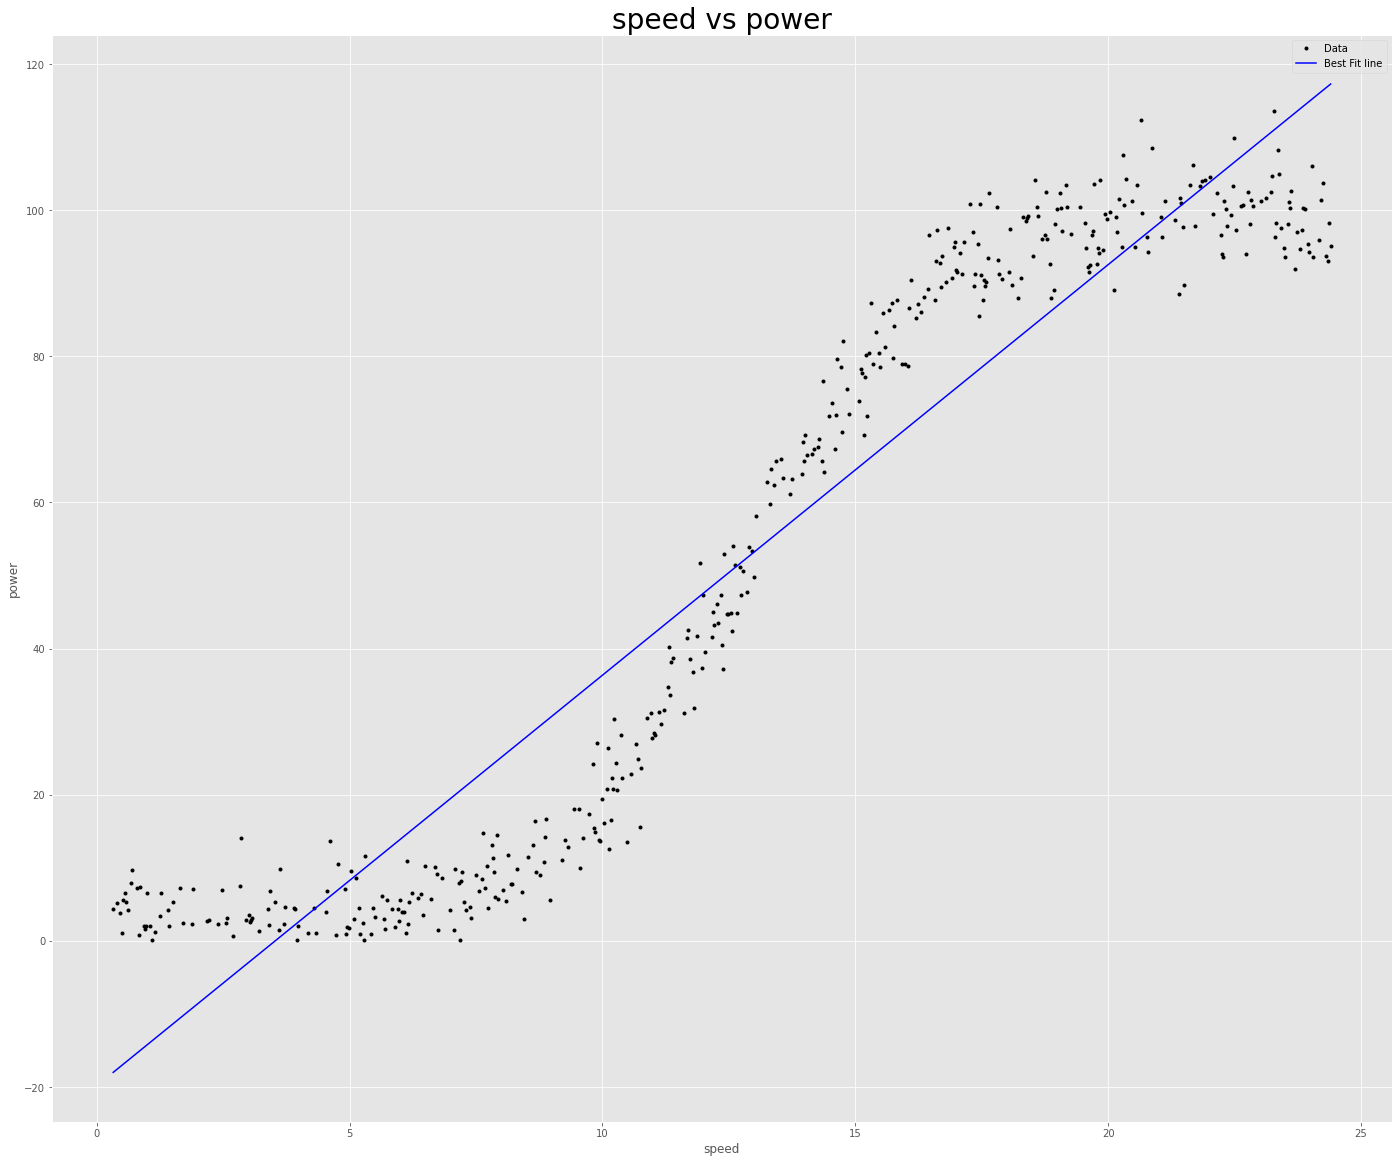

In [22]:
#plotting best fit line
plt.plot(speed2,power2,'.',color='black',label='Data')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed2,predict_m3(speed2),color='blue',label = 'Best Fit line')
plt.legend();

### Calculating metrics/accuracy

In [23]:
#calculating rmse
rmse3 = np.sqrt(mean_squared_error(y,predict_m3(x)))

#calculating R-squared
rsq3 = r2_score(y,predict_m3(x),)  

#calucating cost
cost3 = lambda m,c: np.sum([(y[i] - coeffs3[0] * x[i] - coeffs3[1])**2 for i in range(y.size)])
c3 = cost3(coeffs3[0],coeffs3[1])

In [24]:
#print of regression accuarcy/metrics
print("The R-squared value is %6.4f" % rsq3)
print("The Root Mean Squared error value is %6.4f" % rmse3)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs3[0],coeffs3[1], cost3(coeffs3[0],coeffs3[1])))

The R-squared value is 0.8985
The Root Mean Squared error value is 12.8967
Cost with m =  5.62 and c = -19.84: 75012.39


### Splitting into test and training data

In [74]:
#importing train test split functionality
from sklearn.model_selection import train_test_split

#splitting the data taking 33% of the data as the test size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#variable for model type
model2 = lin.LinearRegression()

##fitting data to the model
model2.fit(X_train, y_train)

#variable for coefficients
coeffs4 = [model2.coef_[0],model.intercept_]

### Predict model

In [75]:
def predict_m4(x):
    return coeffs4[0] *+ x + coeffs4[1]

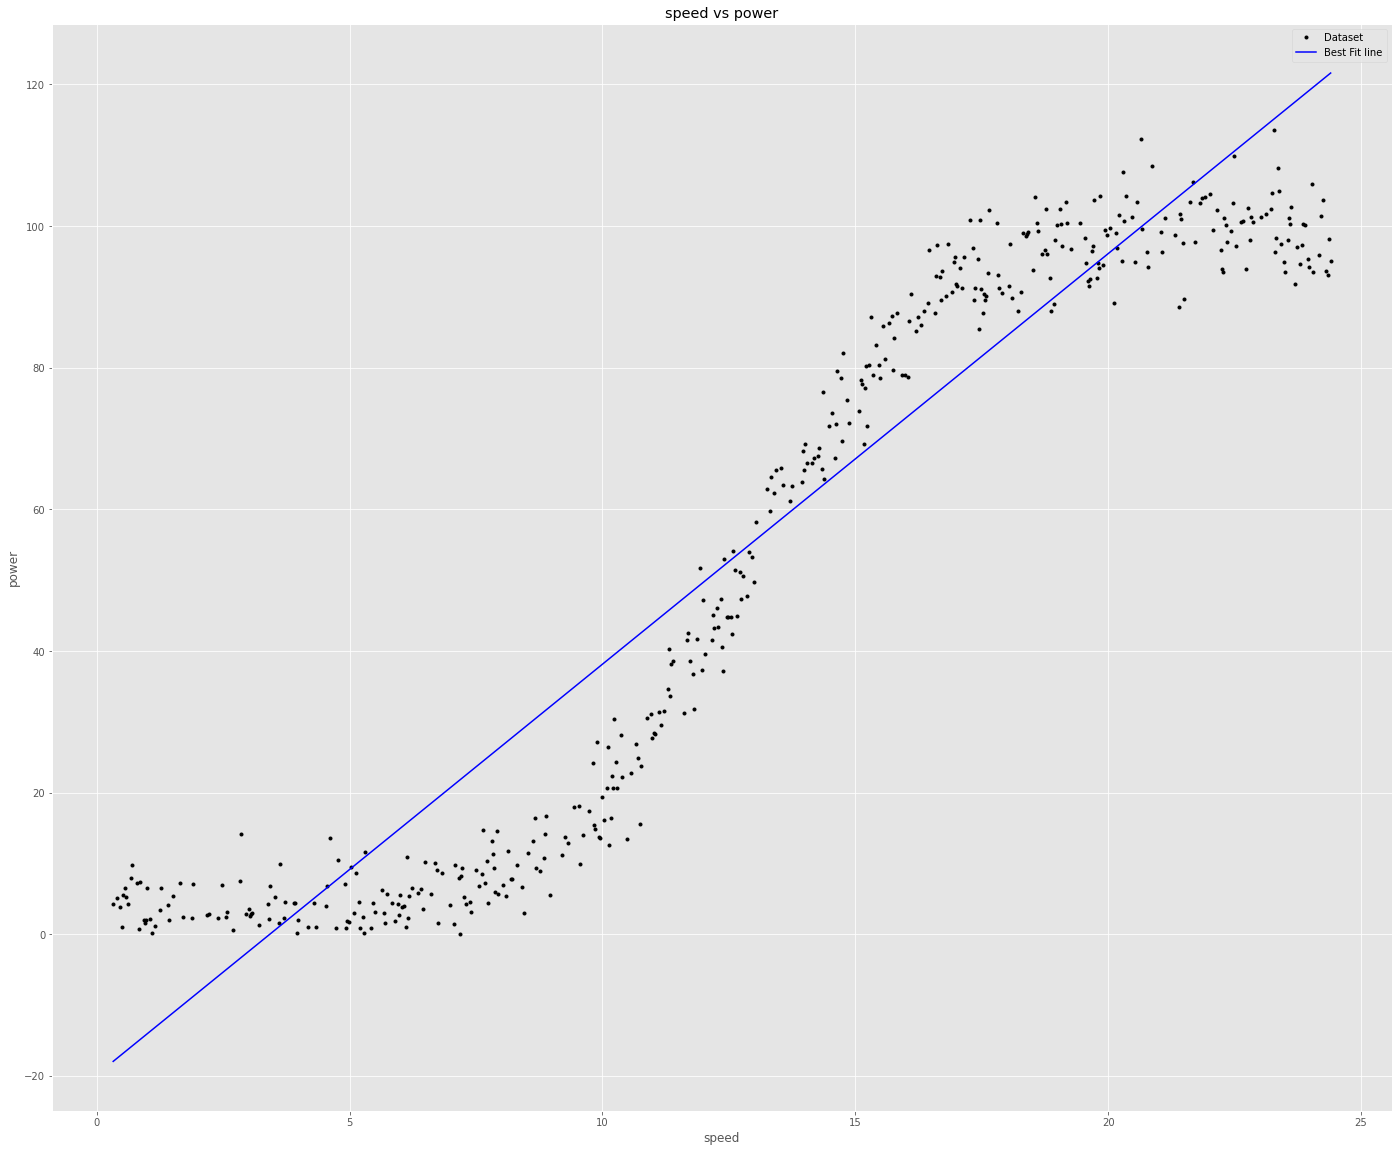

In [76]:
#plotting data
plt.plot(speed2,power2,'.',color='black',label = 'Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed2,predict_m4(speed2),color='blue',label = 'Best Fit line')
plt.legend();

### Calculating metrics/accuarcy

In [77]:
#rmse
rmse4 = np.sqrt(mean_squared_error(y_train,predict_m4(X_train)))

#R-squared
rsq4 = r2_score(y_train,predict_m4(X_train) ) 

#cost
cost4 = lambda m,c: np.sum([(y_train[i] - coeffs4[0] * X_train[i] - coeffs4[1])**2 for i in range(y_train.size)])
c4 = cost4(coeffs4[0],coeffs4[1])

In [78]:
print("The R-squared value is %6.4f" % rsq4)
print("The Root Mean Squared error value is %6.4f" % rmse4)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs4[0],coeffs4[1], cost4(coeffs4[0],coeffs4[1])))

The R-squared value is 0.9018
The Root Mean Squared error value is 12.7321
Cost with m =  5.80 and c = -19.84: 48956.35


***

## Comparison Dataframe of models

We can compare the difference in the R-squared value and cost value between model 1 (all the data) and model 2 (zero values for power removed)

In [30]:
#ref https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas

#comparison data frame creation with column names
compare_df = pd.DataFrame(columns = ['R-squared', 'Cost','RMSE'])

In [31]:
#adding data from 1st regression
compare_df = compare_df.append({'R-squared':rsq,'Cost':c1,'RMSE':rmse,'Model':'All Data'},ignore_index=True)

#adding data from 2nd regression
compare_df = compare_df.append({'R-squared':rsq2,'Cost':c2,'RMSE':rmse2,'Model':'Outliers Removed'},ignore_index=True)

#adding dta from 3rd regression
compare_df = compare_df.append({'R-squared':rsq3,'Cost':c3,'RMSE':rmse3,'Model':'SK Learn Outliers Removed'},ignore_index=True)

#addign data from 4th regression
compare_df = compare_df.append({'R-squared':rsq4,'Cost':c4,'RMSE':rmse4,'Model':'SK Learn Trained Data, outliers removed'},ignore_index=True)

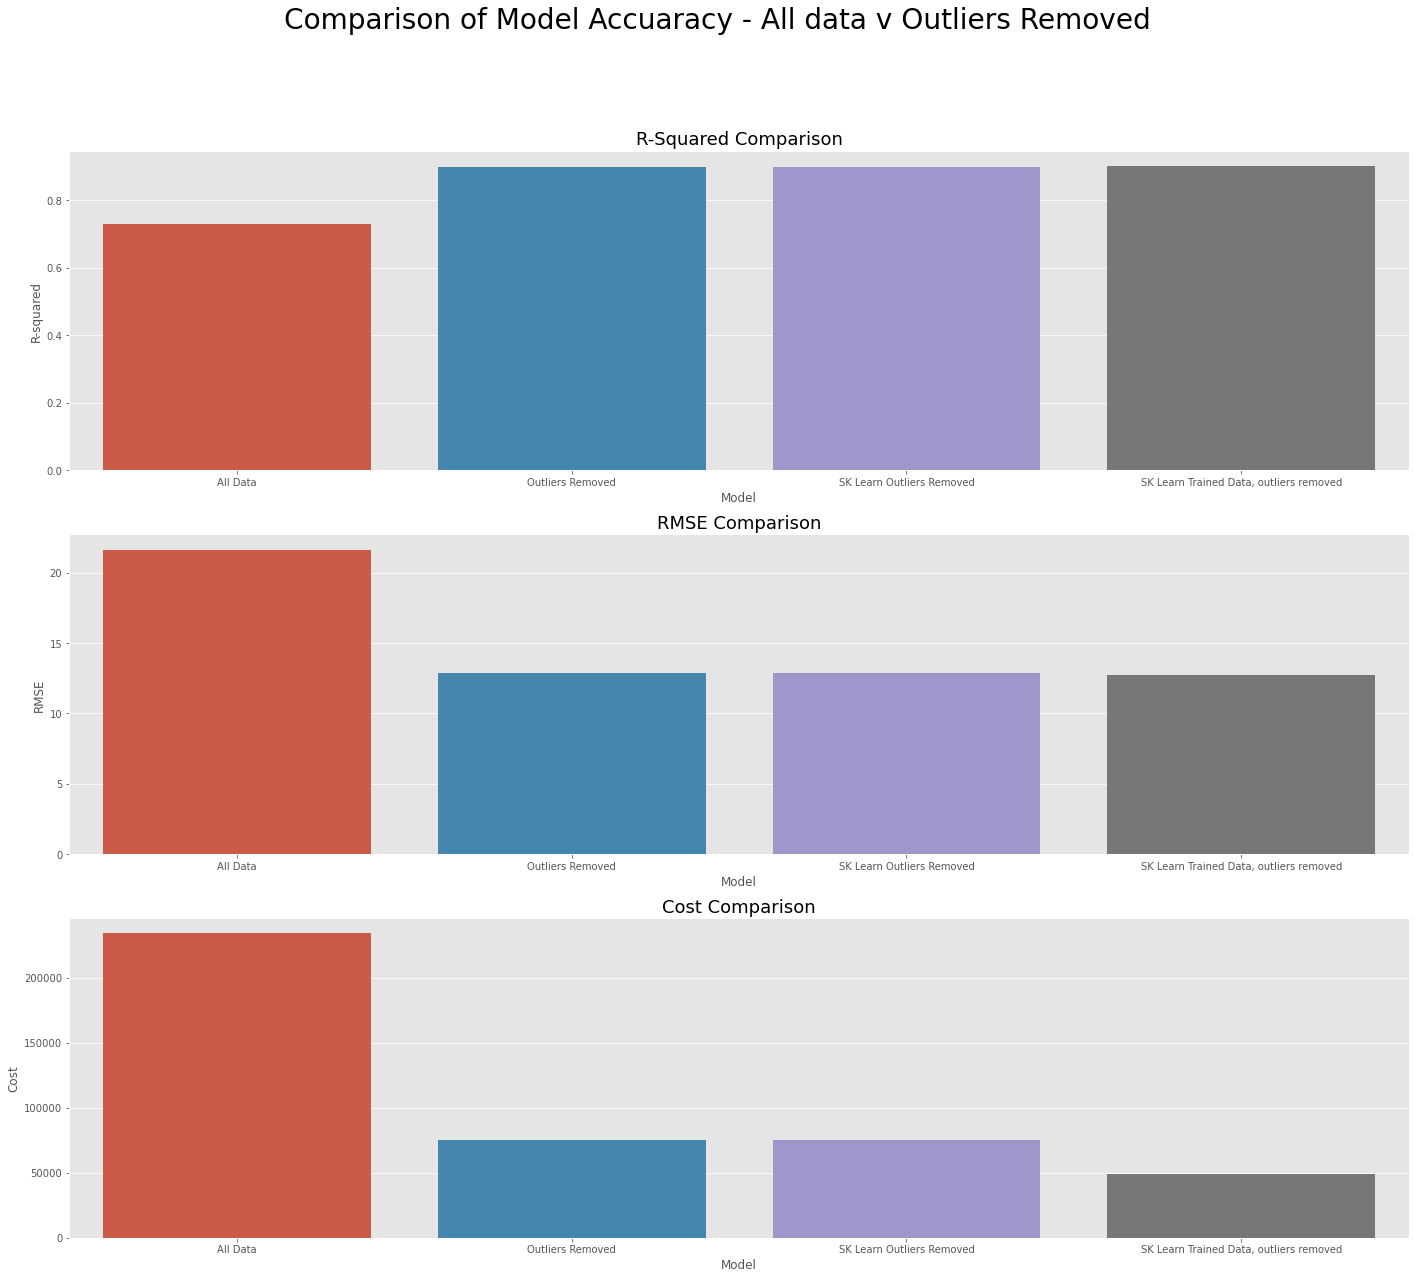

In [32]:
#subplot title
plt.suptitle('Comparison of Model Accuaracy - All data v Outliers Removed',fontsize=28)

#subplots, 3 rows 1 column
plt.subplot(3,1,1)
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-Squared Comparison',fontsize=18)

plt.subplot(3,1,2)
sns.barplot(x='Model',data=compare_df,y='RMSE')
plt.title('RMSE Comparison',fontsize=18);

plt.subplot(3,1,3)
sns.barplot(x='Model',data=compare_df,y='Cost')
plt.title('Cost Comparison',fontsize=18);

There is no real difference between the results we get from using numpy poltfit method and sklearn. However when using a model that splits the data into test and training data, we see this reduces the cost compared to the other models based on the same dataset.

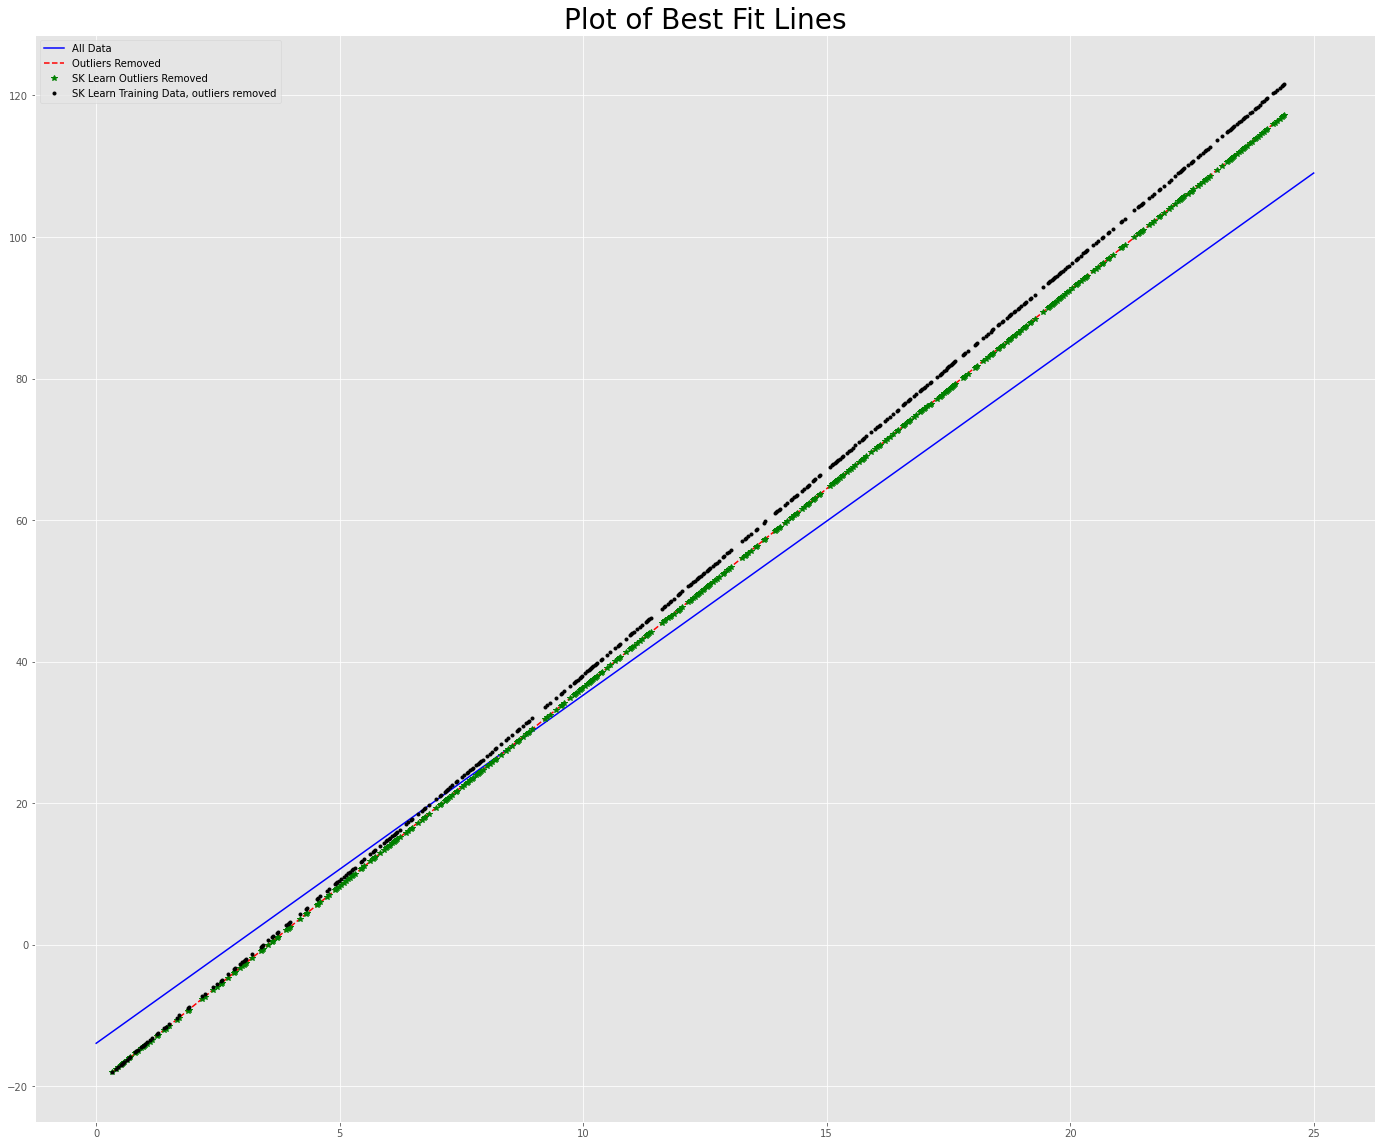

In [33]:
#plot comparing each best fit lone from each regression
plt.title('Plot of Best Fit Lines',fontsize=28)
plt.plot(speed,predict_m1(speed),color='blue',label = 'All Data')
plt.plot(speed2,predict_m2(speed2),'--',color='red',label = 'Outliers Removed')
plt.plot(speed2,predict_m3(speed2),'*',color='green',label = 'SK Learn Outliers Removed')
plt.plot(speed2,predict_m4(speed2),'.',color='black',label = 'SK Learn Training Data, outliers removed')
plt.legend();

### Plot of each best fit line

The 4 best fit lines from each model are plotted below. We can observe that there is very little difference between the numpy polyfit method and sklearn method. Where we see a difference is when the data is split using sklearn.

### Prediction Function output examples

In [34]:
#comparison of predict outputs betwwen the four regressions
print("Prediction when speed is at 20 using all data and polyfit function: ",predict_m1(20))
print("Prediction when speed is at 20 using polyfit with outliers removed: ",predict_m2(20))
print("Prediction when speed is at 20 using polyfit with outliers removed: ",predict_m3(20))
print("Prediction when speed is at 20 using sklearn,outliers removed and splitting data into training and test: ",predict_m4(20))
print(" ")
print("Prediction when speed is at 10 using all data and polyfit function: ",predict_m1(10))
print("Prediction when speed is at 10 using polyfit with outliers removed: ",predict_m2(10))
print("Prediction when speed is at 10 using polyfit with outliers removed: ",predict_m3(10))
print("Prediction when speed is at 10 using sklearn,outliers removed and splitting data into training and test: ",predict_m4(10))

Prediction when speed is at 20 using all data and polyfit function:  84.4520106775738
Prediction when speed is at 20 using polyfit with outliers removed:  92.53887130346243
Prediction when speed is at 20 using polyfit with outliers removed:  92.53887130346246
Prediction when speed is at 20 using sklearn,outliers removed and splitting data into training and test:  96.11298045506138
 
Prediction when speed is at 10 using all data and polyfit function:  35.276054023527095
Prediction when speed is at 10 using polyfit with outliers removed:  36.350592925677034
Prediction when speed is at 10 using polyfit with outliers removed:  36.35059292567703
Prediction when speed is at 10 using sklearn,outliers removed and splitting data into training and test:  38.137647501476486


***

## Polynomial Regression

Observing the data we can see that a straight line is not the best fit. Using the data with outliers removed we can implement a polynomial regression to fit a curve to the data. Polynomial Regression captures non-linear relationships between variables.

Polynomial regression is one of several methods of curve fitting. With polynomial regression, the data is approximated using a polynomial function.

$y=(\beta_0+\beta_1x_{i}+\beta_{2}x_{i}^2+...+\beta_{n}x_{i}^n)$

*In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y*

Polynomial regression is still a linear regression. Apllying varying degrees or orders fit a curve to the data. Simple linear regression could be said to be a polynomial with a degree of 1.

*A polynomial’s degree is simply the highest power of any of its terms*  

Polynomial regression is not great with extreme outliers. The data with outliers removed will be used for all polynomial regressions in the notebook

### Examples applying different degree values

In [79]:
# generate a polynimoial regression to the 3rd degree
poly1 = PolynomialFeatures(degree=3)#, include_bias=False)
x_poly1 = poly1.fit_transform(x)
 
# Polynomial Fitting
poly1_reg = lin.LinearRegression()
poly1_reg.fit(x_poly1, y)
    
#variables for creating metrics variables
x_poly1 = poly1.fit_transform(x)
y_pred1 = poly1_reg.predict(x_poly1)

#mse calculation
poly1_mse = mean_squared_error(y, y_pred1)

#rmse calculation
poly1_rmse = np.sqrt(poly1_mse)

#rsq calculation
poly1_r2score = r2_score(y, y_pred1)

#ref https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18
#cost calculation - 
poly1_cost = np.sum((poly1_reg.predict(poly1.fit_transform(x))-y)**2)

In [80]:
# generate a polynimoial regression to the 6th degree
poly2 = PolynomialFeatures(degree=6)#, include_bias=False)
x_poly2 = poly2.fit_transform(x)
 
# Polynomial Fitting
poly2_reg = lin.LinearRegression()
poly2_reg.fit(x_poly2, y)
    
#variables for creating metrics variables
x_poly2 = poly2.fit_transform(x)
y_pred2 = poly2_reg.predict(x_poly2)

#mse calculation
poly2_mse = mean_squared_error(y, y_pred2)

#rmse calculation
poly2_rmse = np.sqrt(poly2_mse)

#r-squared calcualtion
poly2_r2score = r2_score(y, y_pred2)

#cpst calcualtion
poly2_cost = np.sum((poly2_reg.predict(poly2.fit_transform(x))-y)**2)

In [81]:
# generate a polynimoial regression to the 20th degree
poly3 = PolynomialFeatures(degree=20)#, include_bias=False)
x_poly3 = poly3.fit_transform(x)
 
# Polynomial Fitting
poly3_reg = lin.LinearRegression()
poly3_reg.fit(x_poly3, y)
    
#variables for creating metrics variables
x_poly3 = poly3.fit_transform(x)
y_pred3 = poly3_reg.predict(x_poly3)

#mse calcuation
poly3_mse = mean_squared_error(y, y_pred3)

#rmse calcualtion
poly3_rmse = np.sqrt(poly3_mse)

#r-sqaued calculation
poly3_r2score = r2_score(y, y_pred3)

#cost calculation
poly3_cost = np.sum((poly3_reg.predict(poly3.fit_transform(x))-y)**2)

### Comparison

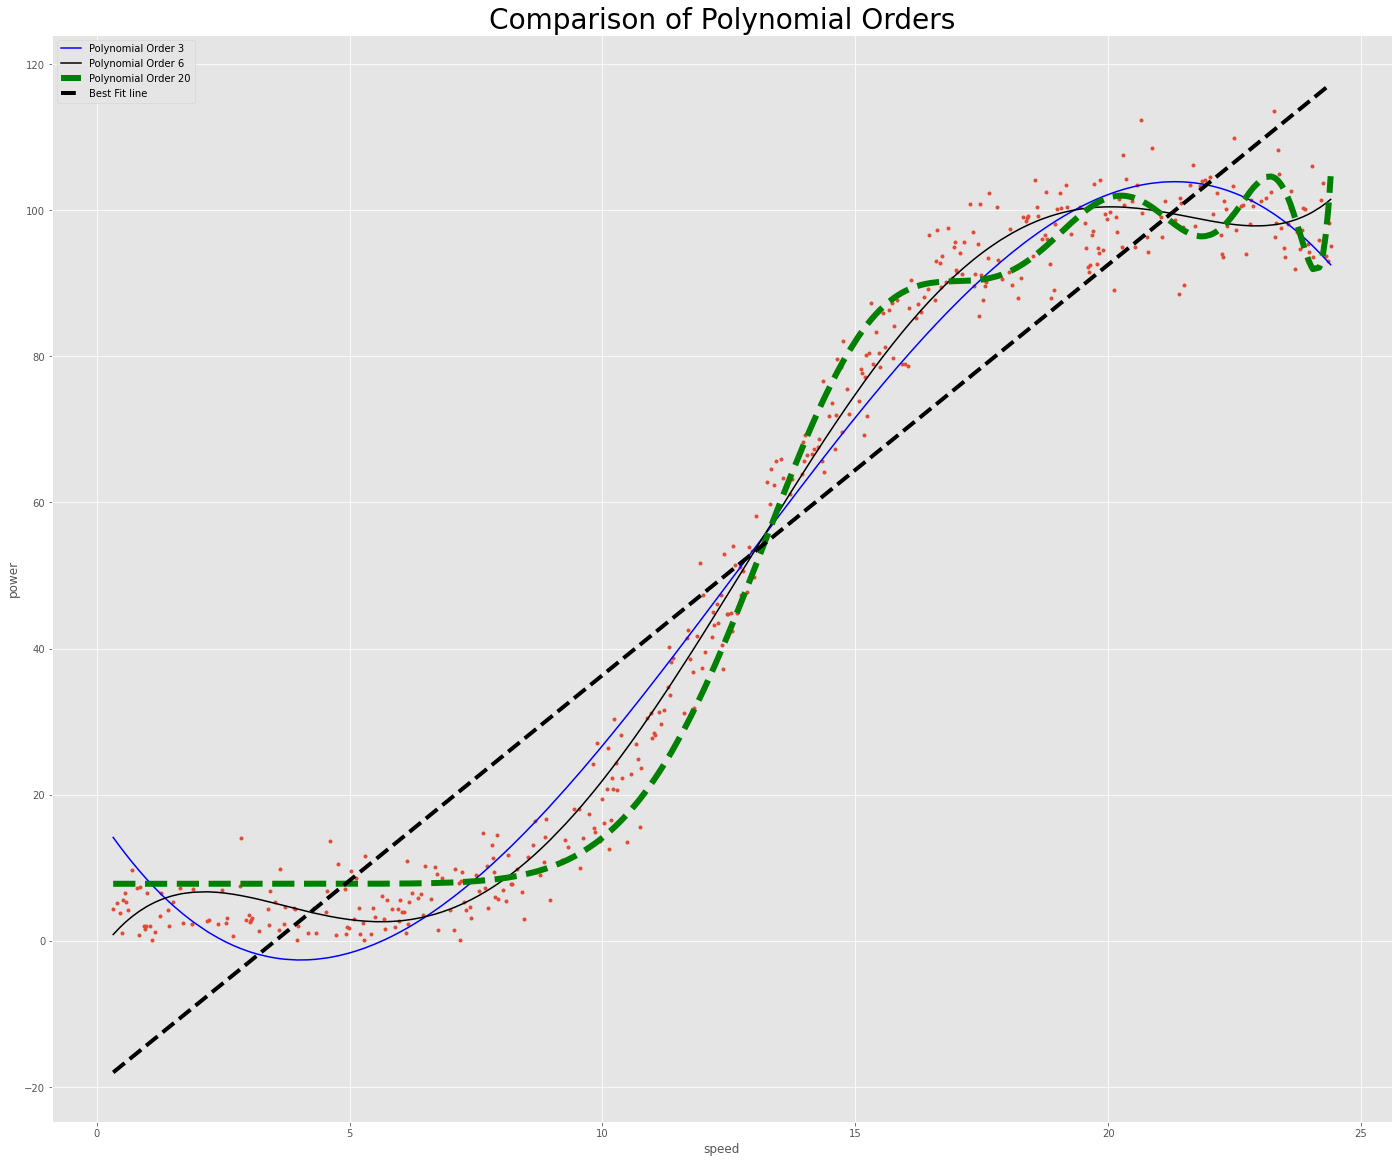

In [82]:
#data with outliers removed
plt.plot(x, y, '.')

#poly 1 3rd order
plt.plot(x, poly1_reg.predict(poly1.fit_transform(x)), color='blue',label = 'Polynomial Order 3')

#ploy2 6th order
plt.plot(x, poly2_reg.predict(poly2.fit_transform(x)), color='black',label = 'Polynomial Order 6')

#poly3 20th order
plt.plot(x, poly3_reg.predict(poly3.fit_transform(x)),'--', color='green',label = 'Polynomial Order 20',linewidth=6)

#best fit regression line, dat with outliers removed
plt.plot(speed2,predict_m2(speed2),'--',color='black',label = 'Best Fit line',linewidth=4)

#title, x and y labels, legend
plt.title('Comparison of Polynomial Orders',fontsize = 28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')
plt.legend();

We can obsrve from the above plot that the polynomial with a degree of 3 fits much better than or simaple linear model although it still predicts values less than zero. Oberving the polynomial with a degree of 6, this looks a better fit.

Observing the polynomial with a degree of twenty we can see there is overfitting of the dta particulary the higher values. Overfitting is an issue as the model loses some of its randomness. We can clearly see that the straight line over and underfits in places.

Looking at various metrics we will apply the best degree of polynomial and apply that. For this we will identify thrugh a cross validated to identify the lowest RMSE, Cost and highest R-Square values.

*Underfitting occurs when our model fails to capture the underlying trend in our data. Overfitting occurs when our model includes too much “noise” and fails to capture the general trend. A good fit neither underfits nor overfits our data and has a low bias and low variance.*

### Metrics/Accuracy of the above polynomial models

In [83]:
#print off accuaracy/metics for each polynomial
print('R2 Score for Polynomial Order of 3: ',poly1_r2score)
print('RMSE for Polynomial Order of 3: ',poly1_rmse)
print('MSE Score for Polynomial Order of 3: ',poly1_mse)
print('Cost Score for Polynomial Order of 3: ',poly1_cost)
print(" ")

print('R2 Score for Polynomial Order of 6: ',poly2_r2score)
print('RMSE For Polynomial Order of 6: ',poly2_rmse)
print('MSE Score for Polynomial Order of 6: ',poly2_mse)
print('Cost Score for Polynomial Order of 6: ',poly2_cost)

print(" ")
print('R2 Score for Polynomial Order of 20: ',poly3_r2score)
print('RMSE Score for Polynomial Order of 20: ',poly3_rmse)
print('MSE Score for Polynomial Order of 20: ',poly3_mse)
print('Cost Score for Polynomial Order of 20: ',poly3_cost)

R2 Score for Polynomial Order of 3:  0.9783216723216328
RMSE for Polynomial Order of 3:  5.959671638433299
MSE Score for Polynomial Order of 3:  35.51768603794625
Cost Score for Polynomial Order of 3:  16018.476403113757
 
R2 Score for Polynomial Order of 6:  0.9879917220795591
RMSE For Polynomial Order of 6:  4.435573794909076
MSE Score for Polynomial Order of 6:  19.6743148900841
Cost Score for Polynomial Order of 6:  8873.11601542793
 
R2 Score for Polynomial Order of 20:  0.9816654457383702
RMSE Score for Polynomial Order of 20:  5.480808420452673
MSE Score for Polynomial Order of 20:  30.039260941704928
Cost Score for Polynomial Order of 20:  13547.706684708923


From the theses three moels, the polynomial using a degree (order) of 6 provides the lowest RMSE, the lowest Cost and highest R-squared value. Comparing degree 6 with degree 20 we can see that these metrics begin to reverse. In order to identify to correct degree to use we can perfom a cross validation

### Identifying to correct polynomial degree

In [84]:
# ref https://developpaper.com/an-example-of-python-determining-the-order-of-polynomial-fitting-regression/

#empty list for rmses values
rmses = []

#emppty list for cost values
cost = []

#empty list for rsq values
rsq = []

#range of degrees to loop through as degree (poly order) value
degrees = np.arange(1, 21)

#for loop to iterate through degree (order) values
for deg in degrees:
    # generate a polynimoial regression to the nth degree
    poly = PolynomialFeatures(degree=deg)#, include_bias=False)
    x_poly = poly.fit_transform(x)
 
    # Polynomial Fitting
    poly_reg = lin.LinearRegression()
    poly_reg.fit(x_poly, y)
    
    #variables for metrics
    x_poly = poly.fit_transform(x)
    y_pred = poly_reg.predict(x_poly)
    
    #rmse
    poly_rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    #append to rmse list
    rmses.append(poly_rmse)
    
    #cost
    poly_cost = np.sum((poly_reg.predict(poly.fit_transform(x))-y)**2)
    
    #append to cost list 
    cost.append(poly_cost)
    
    #rsq
    poly_rsq = r2_score(y,y_pred)
    
    #append to rsq list
    rsq.append(poly_rsq)

 ### Dataframe for results of the cross validation

In [85]:
#list of degree vaues
deg_list = list(degrees)

#dataframe creation 
degree_df = pd.DataFrame(deg_list,columns=['Degrees'])

#adding rmse column
degree_df['RMSE'] = rmses

#adding cost column
degree_df['Cost'] = cost

#adding r-squared column
degree_df['RSQ'] = rsq

#dataframe first five rows
degree_df.head(5)

,Degrees,RMSE,Cost,RSQ
0,1,12.896689,75012.385410,0.898483
1,2,12.854649,74524.139146,0.899144
2,3,5.959672,16018.476403,0.978322
3,4,5.863363,15504.939849,0.979017
4,5,4.438059,8883.061326,0.987978


### Lowest degree for RMSE, Cost and R-squared

In [86]:
#ref https://stackoverflow.com/questions/58682893/select-a-pandas-dataframe-row-where-column-has-minimum-value
print(degree_df[degree_df['RMSE']==degree_df['RMSE'].min()])
print(" ")
print(degree_df[degree_df['Cost']==degree_df['Cost'].min()])
print(" ")
print(degree_df[degree_df['RSQ']==degree_df['RSQ'].max()])

    Degrees      RMSE         Cost       RSQ
10       11  4.019758  7287.462658  0.990138
 
    Degrees      RMSE         Cost       RSQ
10       11  4.019758  7287.462658  0.990138
 
    Degrees      RMSE         Cost       RSQ
10       11  4.019758  7287.462658  0.990138


Looping through a range of polynomial degrees from 1 to 20 (inclusive), the degree with the lowest RMSE, Cost and highest R-squared is 11. This cross validation can be also observed in the plots below.

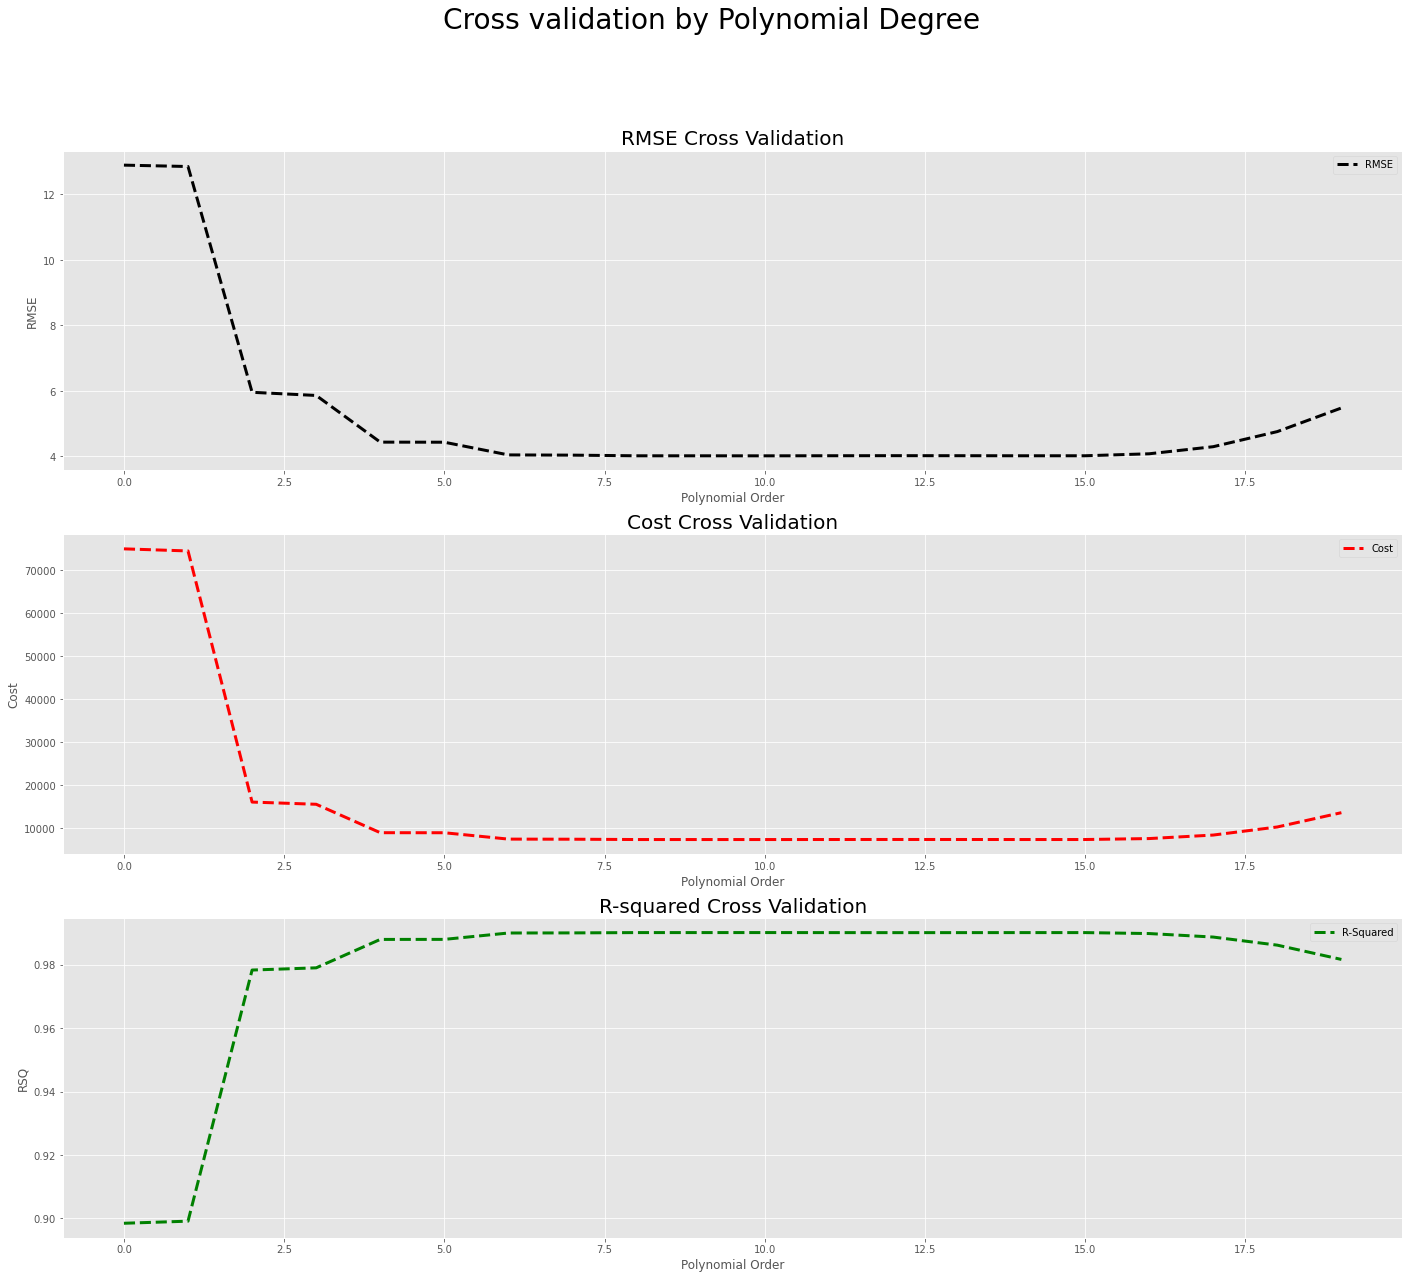

In [89]:
#plots of each metric value against polynomial order
plt.suptitle('Cross validation by Polynomial Degree',fontsize=28)
plt.subplot(3,1,1)
plt.plot(degree_df['RMSE'],'--',color='black',linewidth=3,label='RMSE')
plt.title('RMSE Cross Validation',fontsize=20)
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(3,1,2)
plt.plot(degree_df['Cost'],'--',color='red',linewidth=3,label = 'Cost')
plt.title('Cost Cross Validation',fontsize=20)
plt.xlabel('Polynomial Order')
plt.ylabel('Cost')
plt.legend()

plt.subplot(3,1,3)
plt.plot(degree_df['RSQ'],'--',color='green',linewidth=3,label = 'R-Squared')
plt.title('R-squared Cross Validation',fontsize=20)
plt.xlabel('Polynomial Order')
plt.ylabel('RSQ')
plt.legend();

### Applying the best polynomial degree

In [90]:
# generate a polynimoial regression to the 11th degree
poly4 = PolynomialFeatures(degree=11)#, include_bias=False)
x_poly4 = poly4.fit_transform(x)
 
# Polynomial Fitting
poly4_reg = lin.LinearRegression()
poly4_reg.fit(x_poly4, y)
    
#varaible for metrics
x_poly4 = poly4.fit_transform(x)
y_pred4 = poly4_reg.predict(x_poly4)

#mse calculation
poly4_mse = mean_squared_error(y, y_pred4)

#rmse calculation
poly4_rmse = np.sqrt(poly4_mse)

#rsq calcualtion
poly4_r2score = r2_score(y, y_pred4)

#cost calcualtion
poly4_cost = np.sum((poly4_reg.predict(poly4.fit_transform(x))-y)**2)

### Plot of polynomia of 11 degrees

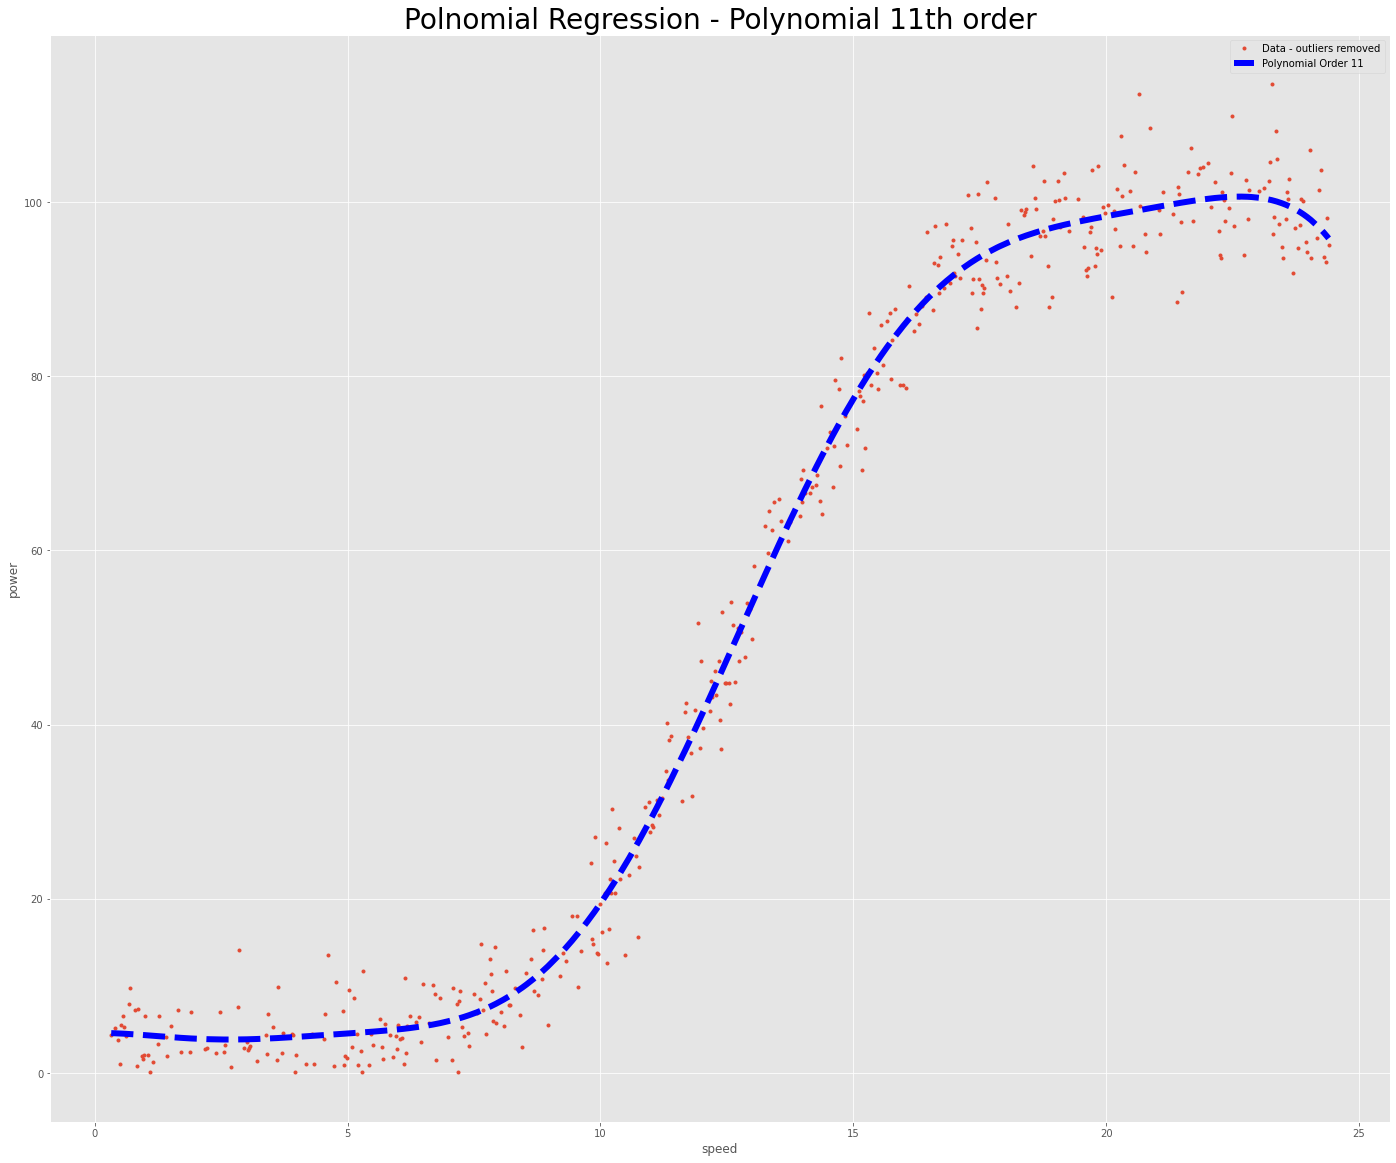

In [91]:
plt.plot(x, y, '.',label ='Data - outliers removed')
plt.plot(x, poly4_reg.predict(poly4.fit_transform(x)),'--', color='blue',label = 'Polynomial Order 11',linewidth=6)
plt.title("Polnomial Regression - Polynomial 11th order",fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')
plt.legend();

### Model Accuaracy

In [92]:
#print of model metrics
print('R2 Score for Polynomial Order of 20: ',poly4_r2score)
print('RMSE Score for Polynomial Order of 20: ',poly4_rmse)
print('MSE Score for Polynomial Order of 20: ',poly4_mse)
print('Cost Score for Polynomial Order of 20: ',poly4_cost)

R2 Score for Polynomial Order of 20:  0.9901376385952355
RMSE Score for Polynomial Order of 20:  4.0197579263998575
MSE Score for Polynomial Order of 20:  16.158453786854484
Cost Score for Polynomial Order of 20:  7287.462657871371


### Predict function

In [93]:
#applying different values for prediction model

def predict_poly(value):
    """function to apply value to return a 
    predicted value"""
    
    #prediction variable
    pred = poly4_reg.predict(poly4.fit_transform([[value]]))
    return pred

In [94]:
#print of predictions
print("Prediction when speed is at 5 using polynomial order of 11: ",predict_poly(5))
print("Prediction when speed is at 10 using polynomial order of 11: ",predict_poly(10)) 
print("Prediction when speed is at 17.2 using polynomial order of 11: ",predict_poly(17.2))
print("Prediction when speed is at 20 using polynomial order of 11: ",predict_poly(20))

Prediction when speed is at 5 using polynomial order of 11:  [4.53479207]
Prediction when speed is at 10 using polynomial order of 11:  [19.47513105]
Prediction when speed is at 17.2 using polynomial order of 11:  [92.56185707]
Prediction when speed is at 20 using polynomial order of 11:  [98.37593395]


### Comparing predictions from the polynomial of 11th degrees to the other linear models

In [95]:
print("Prediction when speed is at 5 using all data and polyfit function: ",predict_m1(5))
print("Prediction when speed is at 5 using polyfit with outliers removed: ",predict_m2(5))
print("Prediction when speed is at 5 using polyfit with outliers removed: ",predict_m3(5))
print("Prediction when speed is at 5 using sklearn,outliers removed and splitting data into training and test: ",predict_m4(5))
print("Prediction when speed is at 5 using polynomial order of 11: ",predict_poly(5)) 
print(" ")
print("Prediction when speed is at 15 using all data and polyfit function: ",predict_m1(15))
print("Prediction when speed is at 15 using polyfit with outliers removed: ",predict_m2(15))
print("Prediction when speed is at 15 using polyfit with outliers removed: ",predict_m3(15))
print("Prediction when speed is at 15 using sklearn,outliers removed and splitting data into training and test: ",predict_m4(15))
print("Prediction when speed is at 15 using polynomial order of 11: ",predict_poly(15)) 
print(" ")
print("Prediction when speed is at 20 using all data and polyfit function: ",predict_m1(20))
print("Prediction when speed is at 20 using polyfit with outliers removed: ",predict_m2(20))
print("Prediction when speed is at 20 using polyfit with outliers removed: ",predict_m3(20))
print("Prediction when speed is at 20 using sklearn,outliers removed and splitting data into training and test: ",predict_m4(20))
print("Prediction when speed is at 20 using polynomial order of 11: ",predict_poly(20)) 

Prediction when speed is at 5 using all data and polyfit function:  10.688075696503752
Prediction when speed is at 5 using polyfit with outliers removed:  8.256453736784334
Prediction when speed is at 5 using polyfit with outliers removed:  8.256453736784316
Prediction when speed is at 5 using sklearn,outliers removed and splitting data into training and test:  9.149981024684045
Prediction when speed is at 5 using polynomial order of 11:  [4.53479207]
 
Prediction when speed is at 15 using all data and polyfit function:  59.864032350550445
Prediction when speed is at 15 using polyfit with outliers removed:  64.44473211456973
Prediction when speed is at 15 using polyfit with outliers removed:  64.44473211456975
Prediction when speed is at 15 using sklearn,outliers removed and splitting data into training and test:  67.12531397826893
Prediction when speed is at 15 using polynomial order of 11:  [77.39074877]
 
Prediction when speed is at 20 using all data and polyfit function:  84.452010

*** 

## Adding polynomial to *compare_df*

In [96]:
#appending polynomial metrics into comparison df
compare_df = compare_df.append({'R-squared':poly4_r2score,'Cost':poly4_cost,'RMSE':poly4_rmse,'Model':'11th Polynomial'},ignore_index=True)

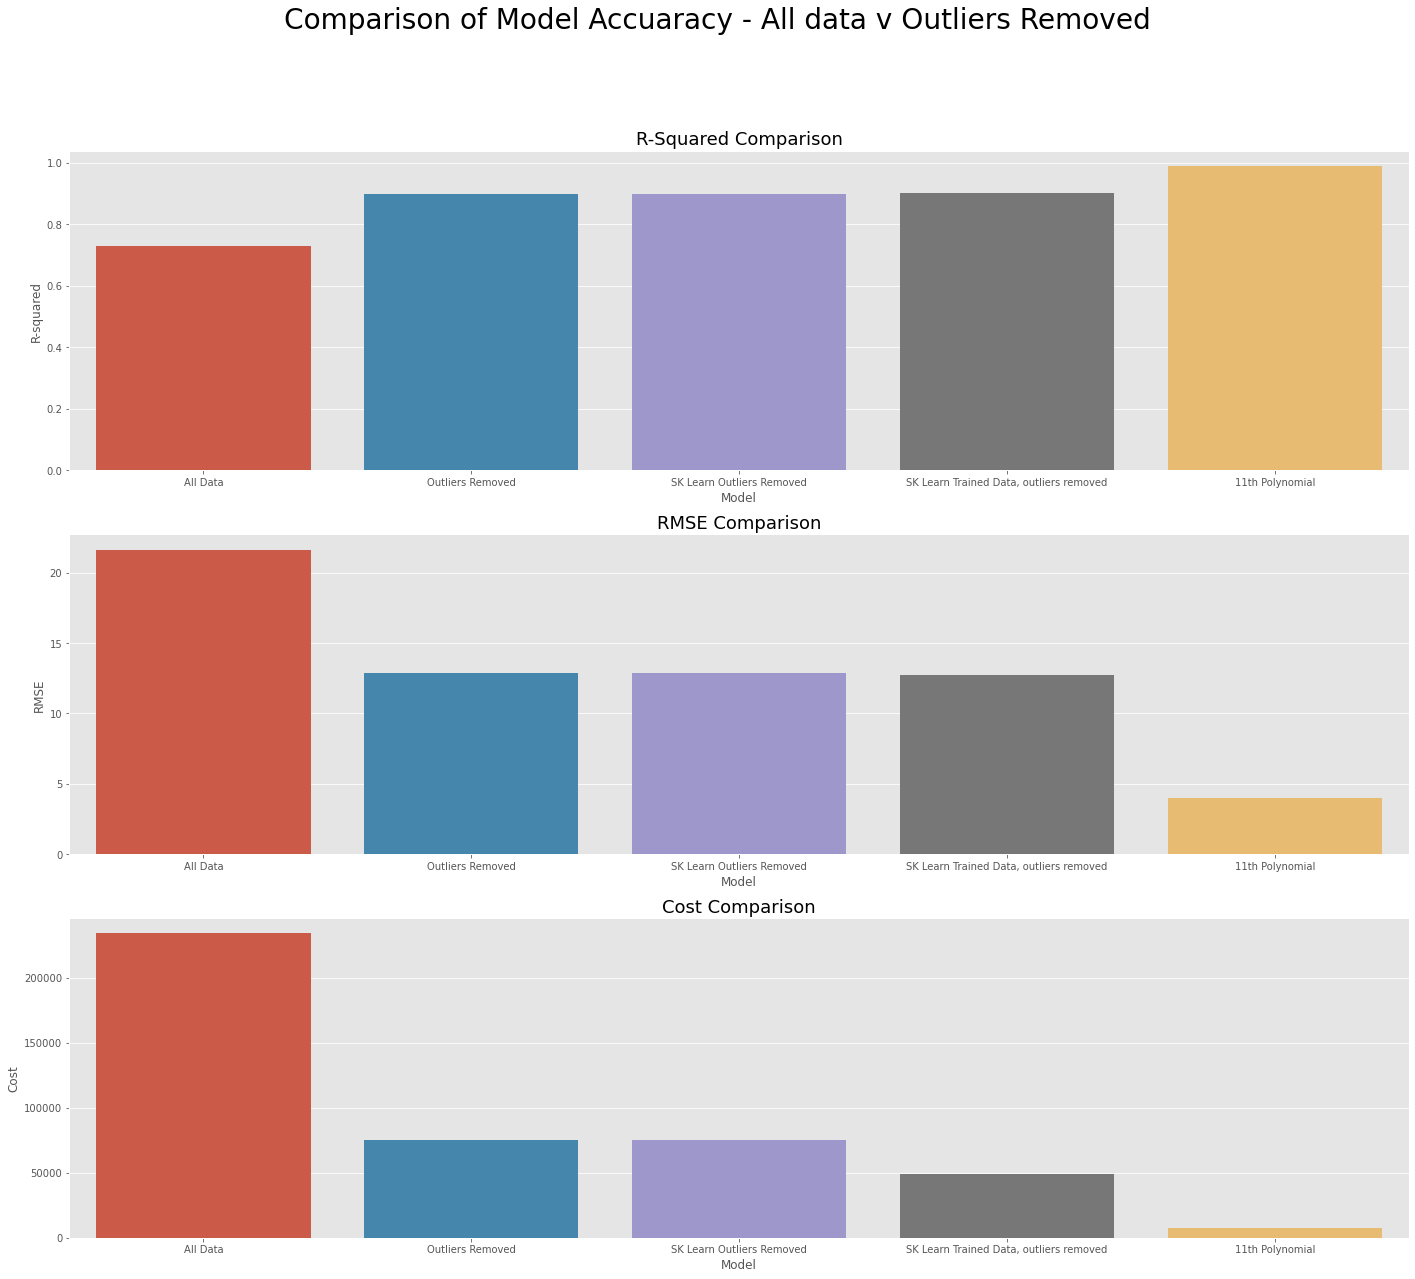

In [51]:
plt.suptitle('Comparison of Model Accuaracy - All data v Outliers Removed',fontsize=28)

plt.subplot(3,1,1)
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-Squared Comparison',fontsize=18)

plt.subplot(3,1,2)
sns.barplot(x='Model',data=compare_df,y='RMSE')
plt.title('RMSE Comparison',fontsize=18);

plt.subplot(3,1,3)
sns.barplot(x='Model',data=compare_df,y='Cost')
plt.title('Cost Comparison',fontsize=18);

Observing the above barplots, the polynomial regression offers the the lowest cost, rmse and hghest R-squared values.

***

## References

* https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

* https://www.youtube.com/user/zedstatistics

* http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

* https://www.statisticshowto.com/probability-and-statistics/regression-analysis/

*  https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

*   https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

*  https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

* https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

* https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas

* https://medium.com/ai-in-plain-english/understanding-polynomial-regression-17233786fa74

* https://www.askpython.com/python/examples/polynomial-regression-in-python#7-predicting-the-result

* https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x

* https://towardsdatascience.com/polynomial-regression-the-only-introduction-youll-need-49a6fb2b86de

* https://medium.com/ai-in-plain-english/solving-underfitting-and-overfitting-817f4e62bfa5

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

* https://developpaper.com/an-example-of-python-determining-the-order-of-polynomial-fitting-regression/

* https://stackoverflow.com/questions/58682893/select-a-pandas-dataframe-row-where-column-has-minimum-value

* https://www.w3schools.com/python/python_ml_polynomial_regression.asp

* https://www.youtube.com/watch?v=QptI-vDle8Y

* https://stackoverflow.com/questions/47442102/how-to-find-the-best-degree-of-polynomials

* http://polynomialregression.drque.net/math.html

***


## End

***